We import the necessary libraries: OpenCV (cv2), Matplotlib (plt), and NumPy (np).

In [24]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

We load the two input images (image1 and image2) using OpenCV's imread() function.

In [25]:
image1 = cv2.imread('/kaggle/input/spot-difference/input1.png')
image2 = cv2.imread('/kaggle/input/spot-difference/input2.png')

We convert the loaded images to grayscale using the cvtColor() function. This is necessary because we're working with the differences between images, and grayscale simplifies the comparison.


In [26]:
gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

We compute the absolute difference between the grayscale images using OpenCV's absdiff() function. This gives us an image highlighting the differences between the two input images.

In [27]:
diff = cv2.absdiff(gray_image1, gray_image2)

We threshold the difference image using the threshold() function to obtain a binary image where the differences are emphasized.


In [28]:
_, threshold = cv2.threshold(diff, 30, 255, cv2.THRESH_BINARY)

We apply morphological closing operation using a square-shaped kernel to close small gaps between nearby contours. This helps in grouping nearby differences together.


In [29]:
kernel = np.ones((5,5),np.uint8)
threshold = cv2.morphologyEx(threshold, cv2.MORPH_CLOSE, kernel)

We find contours in the thresholded image using the findContours() function.

In [30]:
contours, _ = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

We iterate over each contour found and extract the bounding rectangle using the boundingRect() function. Then, we draw a black bounding box around each contour using the rectangle() function.


In [31]:
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(image1, (x, y), (x + w, y + h), (0, 0, 0), 2)

Finally, we display the resulting image with the grouped bounding boxes using Matplotlib's imshow() function. We convert the image to RGB format before displaying it because Matplotlib expects RGB format for displaying images. We also set the title and turn off the axis for better visualization.

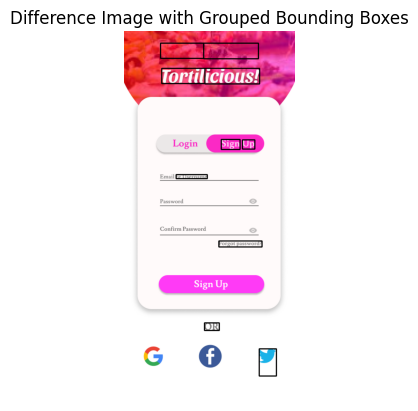

In [32]:
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.title('Difference Image with Grouped Bounding Boxes')
plt.axis('off')
plt.show()